<a href="https://colab.research.google.com/github/ClaretWheel1481/Artificial-Intelligence/blob/main/Plt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
import random
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import KBinsDiscretizer as KBD
from sklearn.ensemble import RandomForestClassifier as RFC
%matplotlib inline
import os
#让jupyter中的图画上的中文都显示出来
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['axes.unicode_minus'] = False
os.environ["KMP DUPLICATE LIB OK"]="TRUE"
data = pd.read_csv('abnormal_orders.txt')

data.head(10)

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,use_id,city,abnormal_label
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
5,3977175284,2013-03-13,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
6,4106833871,2013-04-21,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0
7,4245023523,2013-03-30,10:39:56,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,0
8,4253622967,2013-01-27,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,0
9,4276159555,2013-05-26,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,0


In [ ]:
data.columns

Index(['order_id', 'order_date', 'order_time', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'use_id', 'city', 'abnormal_label'],
      dtype='object')

In [ ]:
data.columns = ["订单ID","下单日期","下单时间","商品一级类别","商品所属渠道","商品ID","品牌","订单金额","销售数量","订单渠道","支付方式","用户名称","用户所在地","异常"]
data.tail(10)

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,销售数量,订单渠道,支付方式,用户名称,用户所在地,异常
134180,4285740031,2013-02-15,23:43:06,生活电器厨卫电器,GO,1000009280,海尔,799.0,1,抢购,合并支付,yisansi0,海口市,0
134181,4285740168,2013-08-16,23:57:28,电脑办公打印文仪,GO,1000374490,黑石,288.0,1,主站,合并支付,alipay-208,佛山市,0
134182,4285740168,2013-04-01,23:57:28,食品酒水,POP,8002179541,蓝峰,19.8,1,主站,合并支付,alipay-208,佛山市,0
134183,4285745040,2013-05-18,23:49:55,家纺寝居,GO,1000379206,逸驰,19.9,1,主站,合并支付,qq-690593b,沈阳市,0
134184,4285745071,2013-05-13,23:50:01,生活电器厨卫电器,GO,1000380943,捷赛,398.0,1,主站,合并支付,qq-f1a32c7,廊坊市,0
134185,4285755067,2013-03-12,23:56:01,电视冰箱洗衣机空调,GO,1000296106,博世,2765.0,1,主站,货到付款,yanshuo3,北京市,0
134186,4285755076,2013-01-23,23:57:24,电视冰箱洗衣机空调,GO,1000296108,西门子,2672.0,1,主站,货到付款,yanshuo3,北京市,0
134187,4285765029,2013-03-24,23:54:34,家具建材,GO,1000348294,埃斯兰德,128.0,1,抢购,合并支付,1350304234,广州市,0
134188,4285770012,2013-09-19,23:55:06,家居日用,GO,1000335947,炊大师,79.0,1,抢购,合并支付,shukun,东莞市,0
134189,4285770056,2013-05-20,23:58:59,生活电器厨卫电器,GO,1000009280,海尔,799.0,1,抢购,合并支付,544975322_,海口市,0


In [ ]:
(data['异常'] == 1).sum()

28457

In [ ]:
print('{:.1f}'.format((data['异常'] == 1).sum()/data.shape[0] * 100),'%')

21.2 %


In [ ]:
data['订单ID'].duplicated().sum()

19212

In [ ]:
data['商品一级类别'].value_counts()

商品一级类别
手机摄影数码       20612
生活电器厨卫电器     19281
家纺寝居         18679
电脑办公打印文仪     11405
家居日用         10642
电视冰箱洗衣机空调     9067
美妆个护          9043
汽车用品          6490
家具建材          4941
食品酒水          4669
健康医疗          4252
服饰鞋帽          4067
运动户外          3934
母婴用品玩具        2664
箱包奢品          1962
钟表首饰           860
图书音像           232
Name: count, dtype: int64

In [ ]:
data['订单渠道'].value_counts()

订单渠道
主站            96894
抢购            16256
手机站点           7098
团购             6294
手机抢购           3095
do.site_id     2394
手机团购           1074
充值              703
当当              377
游戏站点              5
Name: count, dtype: int64

In [ ]:
data['支付方式'].value_counts()

支付方式
合并支付    104274
货到付款     26785
当当支付      2511
在线支付       421
账户余额       199
Name: count, dtype: int64

In [ ]:
data['用户所在地'].value_counts()

用户所在地
北京市        14554
上海市         6637
广州市         6033
深圳市         5468
天津市         3393
           ...  
果洛州            1
昌都地区           1
四川省其他城市        1
江西省其他城市        1
神农架林区          1
Name: count, Length: 365, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134190 entries, 0 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    134190 non-null  int64  
 1   下单日期    134190 non-null  object 
 2   下单时间    134190 non-null  object 
 3   商品一级类别  132800 non-null  object 
 4   商品所属渠道  134190 non-null  object 
 5   商品ID    134190 non-null  int64  
 6   品牌      133418 non-null  object 
 7   订单金额    134189 non-null  float64
 8   销售数量    134190 non-null  int64  
 9   订单渠道    134190 non-null  object 
 10  支付方式    134190 non-null  object 
 11  用户名称    134190 non-null  object 
 12  用户所在地   134188 non-null  object 
 13  异常      134190 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 14.3+ MB


In [ ]:
data.select_dtypes(include='int').head(2)

,订单ID,商品ID,销售数量,异常
0,4277880103,8000001215,1000,0
1,4283851335,8002042497,200,1


In [ ]:
data.isnull().sum()

订单ID         0
下单日期         0
下单时间         0
商品一级类别    1390
商品所属渠道       0
商品ID         0
品牌         772
订单金额         1
销售数量         0
订单渠道         0
支付方式         0
用户名称         0
用户所在地        2
异常           0
dtype: int64

In [ ]:
data.isnull().sum()/data.shape[0]/0.01

订单ID      0.000000
下单日期      0.000000
下单时间      0.000000
商品一级类别    1.035845
商品所属渠道    0.000000
商品ID      0.000000
品牌        0.575304
订单金额      0.000745
销售数量      0.000000
订单渠道      0.000000
支付方式      0.000000
用户名称      0.000000
用户所在地     0.001490
异常        0.000000
dtype: float64

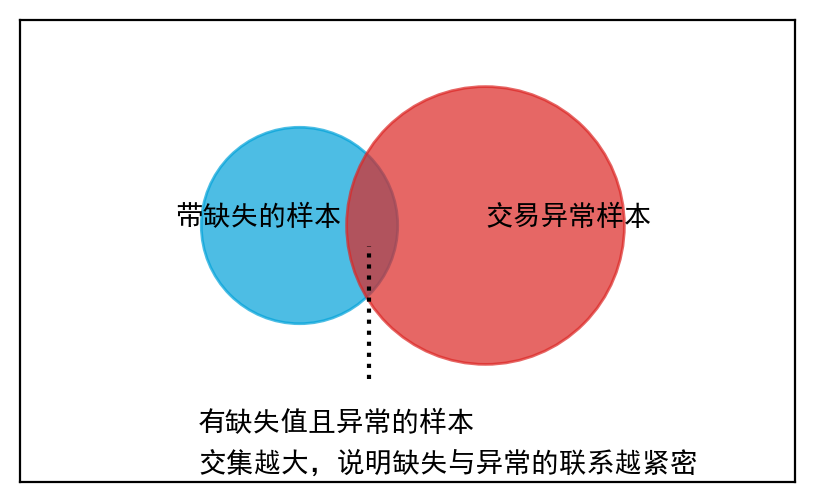

In [ ]:
plt.figure(figsize=(5,3),dpi=200)
plt.scatter(2.8,5,s=5000,c="#01a2d9",alpha=0.7,label="带缺失的样本")
plt.scatter(4,5,s=10000,c="#dc2624",alpha=0.7,label="交易异常样本")
plt.xlim(1,6)
plt.ylim(2.5, 7)
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.text(2,5,s="带缺失的样本",fontsize=10)
plt.text(4,5,s="交易异常样本",fontsize=10)
plt.vlines(3.25,3.5, 4.8, colors="k", linestyles="dotted")
plt.text(2.15,3,s="有缺失值且异常的样本",fontsize=10)
plt.text(2.15,2.6,s="交集越大，说明缺失与异常的联系越紧密",fontsize=10)
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
data['商品一级类别'].isnull().sum()

1390

In [ ]:
data.loc[data['商品一级类别'].isnull(),"异常"].sum()

163

In [ ]:
for i in ['商品一级类别','品牌']:
    ratio1 = 100 * data.loc[data[i].isnull(),"异常"].sum()/data[i].isnull().sum()
    print("缺少({})的样本中异常样本的占比为：{:.3f}%".format(i,ratio1))

缺少(商品一级类别)的样本中异常样本的占比为：11.727%
缺少(品牌)的样本中异常样本的占比为：20.984%


In [ ]:
for i in ['商品一级类别','品牌']:
    ratio2 = 100 * data.loc[data[i].isnull(),"异常"].sum()/(data["异常"]==1).sum()
    print("全部交易异常样本中，缺少({})的样本中异常样本的占比为：{:.3f}%".format(i,ratio2))

全部交易异常样本中，缺少(商品一级类别)的样本中异常样本的占比为：0.573%
全部交易异常样本中，缺少(品牌)的样本中异常样本的占比为：0.569%


In [ ]:
data.dropna(how = "any",inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132761 entries, 1 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    132761 non-null  int64  
 1   下单日期    132761 non-null  object 
 2   下单时间    132761 non-null  object 
 3   商品一级类别  132761 non-null  object 
 4   商品所属渠道  132761 non-null  object 
 5   商品ID    132761 non-null  int64  
 6   品牌      132761 non-null  object 
 7   订单金额    132761 non-null  float64
 8   销售数量    132761 non-null  int64  
 9   订单渠道    132761 non-null  object 
 10  支付方式    132761 non-null  object 
 11  用户名称    132761 non-null  object 
 12  用户所在地   132761 non-null  object 
 13  异常      132761 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 15.2+ MB


In [ ]:
(data["异常"]==1).sum()

28284

In [ ]:
data.duplicated().sum()

8

In [ ]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True)

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,销售数量,订单渠道,支付方式,用户名称,用户所在地,异常
0,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,2013-03-13,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,2013-04-21,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132748,4285755067,2013-03-12,23:56:01,电视冰箱洗衣机空调,GO,1000296106,博世,2765.0,1,主站,货到付款,yanshuo3,北京市,0
132749,4285755076,2013-01-23,23:57:24,电视冰箱洗衣机空调,GO,1000296108,西门子,2672.0,1,主站,货到付款,yanshuo3,北京市,0
132750,4285765029,2013-03-24,23:54:34,家具建材,GO,1000348294,埃斯兰德,128.0,1,抢购,合并支付,1350304234,广州市,0
132751,4285770012,2013-09-19,23:55:06,家居日用,GO,1000335947,炊大师,79.0,1,抢购,合并支付,shukun,东莞市,0


In [ ]:
data['订单ID'].value_counts()

订单ID
4279118253    32
4269390206    23
4271884108    20
4275856215    20
4265415474    19
              ..
4146667708     1
4146667654     1
4146661886     1
4146657953     1
4285770056     1
Name: count, Length: 114207, dtype: int64

In [ ]:
data[data["订单ID"] == 4279118253].head(1)

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,销售数量,订单渠道,支付方式,用户名称,用户所在地,异常
96404,4279118253,2013-07-23,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0


In [ ]:
DupOrder = data["订单ID"].value_counts().index

for i in DupOrder[:30]:
    AbOrder = (data.loc[data["订单ID"] == i,"异常"] == 1).sum()
    print(i,":",AbOrder)

4279118253 : 0
4269390206 : 0
4271884108 : 20
4275856215 : 20
4265415474 : 0
4279551124 : 0
4283874398 : 0
4283873538 : 0
4283874524 : 0
4283339603 : 0
4283874688 : 0
4283874209 : 0
4283873946 : 0
4283339890 : 0
4283339774 : 0
4283336310 : 0
4276167340 : 0
4282842130 : 0
4282842151 : 0
4282842230 : 0
4193043860 : 16
4282512627 : 0
4282842193 : 0
4272509367 : 0
4282513806 : 0
4282513764 : 0
4282561933 : 0
4285070202 : 0
4280659906 : 0
4285070300 : 0


In [ ]:
data.loc[data['订单ID'] == 4271884108,'商品ID'].duplicated().sum()

0

In [ ]:
data.loc[data['订单ID'] == 4193043860,'商品ID'].duplicated().sum()

0

In [ ]:
(data['异常'] == 1).sum()

28284

In [ ]:
data2 = data.drop(columns = '下单日期')
data2[data2.duplicated()].head()

,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,销售数量,订单渠道,支付方式,用户名称,用户所在地,异常
2677,4243842528,23:10:21,食品酒水,POP,8001965291,红星,22.5,3,主站,账户余额,liwengen10,成都市,0
6031,4255866455,19:45:37,母婴用品玩具,GO,1000365111,日本花王,314.0,2,手机站点,账户余额,lyctc05,漳州市,0
6493,4272722309,16:19:49,家纺寝居,GO,1000381520,逸驰,218.0,2,主站,账户余额,bixiaxia43,焦作市,0
35937,3065026161,11:36:31,电视冰箱洗衣机空调,GO,1000369438,伊莱克斯,1699.0,1,主站,合并支付,r117512533,合肥市,0
36847,3536131868,00:26:26,汽车用品,GO,1000371763,倍耐力,560.0,1,主站,合并支付,plbbwan,酒泉市,0


In [ ]:
data.drop(data[data2.duplicated()].index,inplace = True)
data["订单ID"].value_counts()

订单ID
4269390206    23
4271884108    20
4275856215    20
4265415474    19
4283874688    18
              ..
4144311846     1
4283495517     1
4283496150     1
4144240046     1
4285770056     1
Name: count, Length: 114207, dtype: int64

In [ ]:
data[data["订单ID"] == 4269390206].head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,销售数量,订单渠道,支付方式,用户名称,用户所在地,异常
77477,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
77478,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
77479,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
77480,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
77481,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0


In [ ]:
data.reset_index(drop = True).head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,销售数量,订单渠道,支付方式,用户名称,用户所在地,异常
0,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,2013-03-13,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,2013-04-21,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0


In [ ]:
(data["异常"] == 1).sum()

28284

In [ ]:
data.loc[data["异常"] == 1,"订单ID"].value_counts()

订单ID
4271884108    20
4275856215    20
4193043860    16
4272902282    15
4263198458    14
              ..
4275725286     1
4275725271     1
4275725244     1
4275725191     1
4285735014     1
Name: count, Length: 25107, dtype: int64

In [ ]:
data.loc[data["异常"] != 1,"订单ID"].value_counts()

订单ID
4269390206    23
4265415474    19
4283339603    18
4283874209    18
4283339890    18
              ..
4203261483     1
4203261361     1
4203261263     1
4203261137     1
4285770056     1
Name: count, Length: 89105, dtype: int64

In [ ]:
data.loc[data["订单ID"] == 4275856215,"异常"]

4121     1
18204    1
18205    1
18206    1
18207    1
18208    1
18209    1
18210    1
18211    1
18212    1
18213    1
18214    1
18215    1
18216    1
18217    1
18218    1
18219    1
18220    1
18221    1
18222    1
Name: 异常, dtype: int64

In [ ]:
OrderMonth = data["下单日期"].apply(lambda x: x[5:7])
OrderMonth.value_counts()

下单日期
10    11651
06    11201
09    11124
03    11113
07    11011
01    10959
04    10912
05    10888
12    10842
08    10837
11    10723
02    10021
Name: count, dtype: int64

In [ ]:
data.loc[:,["订单金额","销售数量"]].describe()

,订单金额,销售数量
count,131282.000000,131282.000000
mean,667.187834,1.188975
std,2930.730828,1.684653
min,0.500000,1.000000
25%,29.000000,1.000000
50%,98.000000,1.000000
75%,379.000000,1.000000
max,766000.000000,200.000000


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


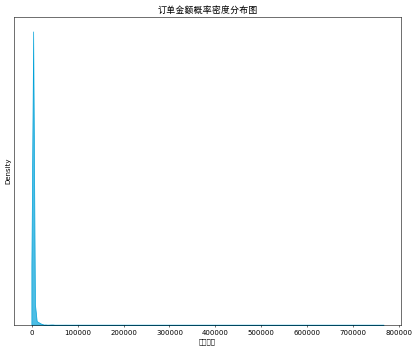

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8),dpi = 50)
sns.kdeplot(data.loc[:,"订单金额"],
            fill="fill",
           color="#01a2d9",
           label="订单金额",
           alpha=.7)
sns.set(style="whitegrid",font_scale=1.1)
plt.title("订单金额概率密度分布图",fontsize=18,font="simhei")
plt.yticks([])
plt.show()